In [4]:
%matplotlib inline
#import library
from plantcv import plantcv as pcv
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
#import time library to measure the execution time
import time
import math
import random

ModuleNotFoundError: No module named 'plantcv'

In [2]:
# automaticly show image after every process
pcv.params.debug="plot"

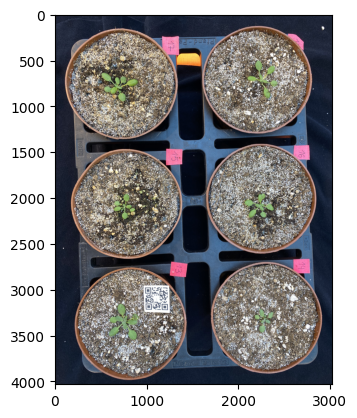

In [3]:
# read an image
img,path,filename=pcv.readimage(filename="../data/image00010.jpeg", mode="rgb")

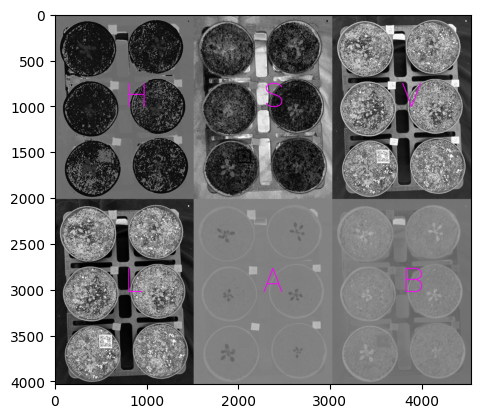

In [6]:
pcv.params.text_size = 24
pcv.params.text_thickness = 20
colorspaces=pcv.visualize.colorspaces(rgb_img=img, original_img=False)

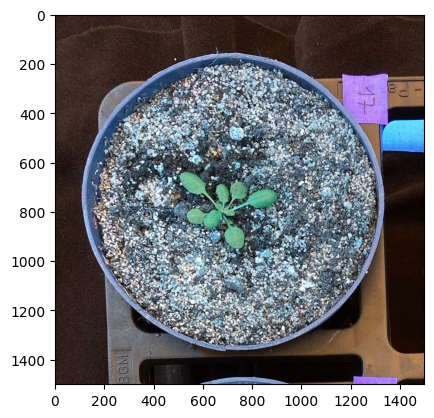

In [12]:
# cut the img into 6 parts each 1500x1500 pixels and save them in to a list img_parts
img_parts=[]
for i in range(0, 6):
    img_parts.append(img[i*1500:(i+1)*1500,0:1500])
# show the first part of the image
plt.imshow(img_parts[0])

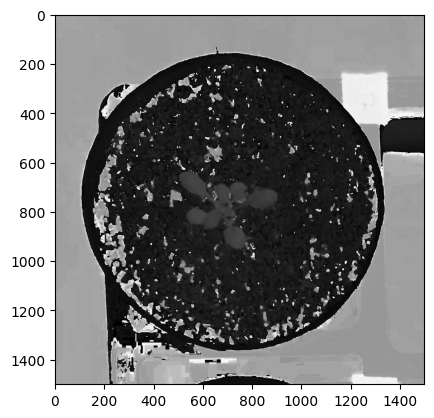

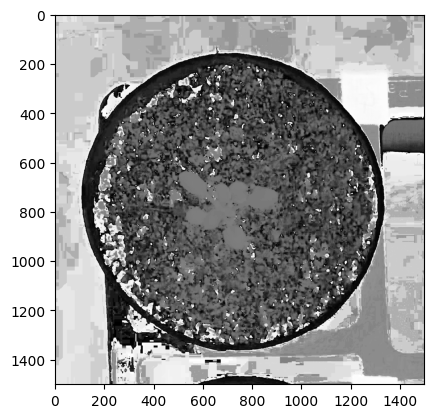

alt.Chart(...)

alt.Chart(...)

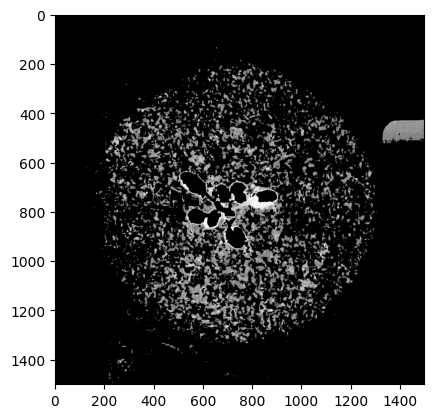

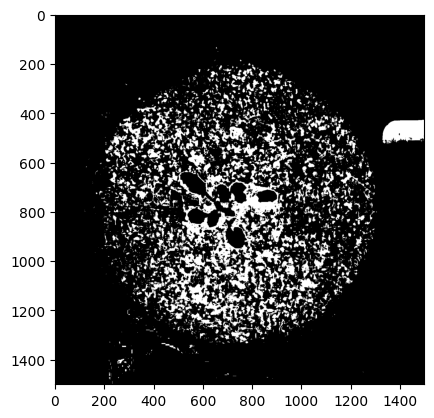

In [21]:
img_H=pcv.rgb2gray_hsv(rgb_img=img_parts[0], channel="H")
img_H_hist_EQU=pcv.hist_equalization(img_H)
pcv.visualize.histogram(img=img_H)
pcv.visualize.histogram(img=img_H_hist_EQU)
img_H_thresh, __ = pcv.threshold.custom_range(img=img_H, lower_thresh=[20], upper_thresh=[40], channel='gray')

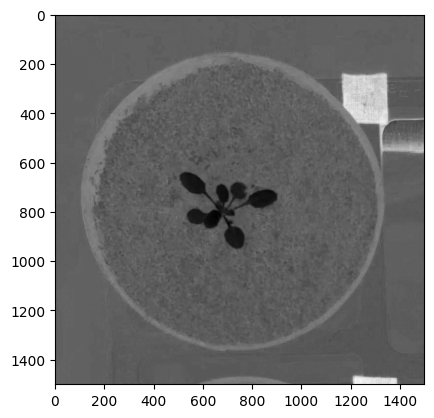

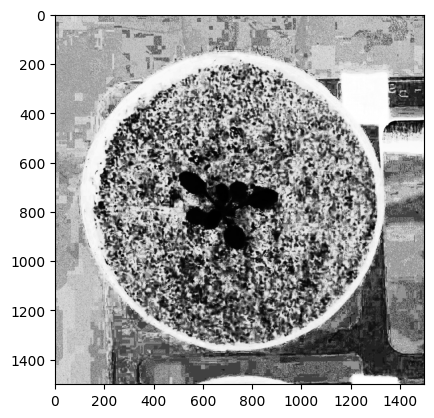

alt.Chart(...)

alt.Chart(...)

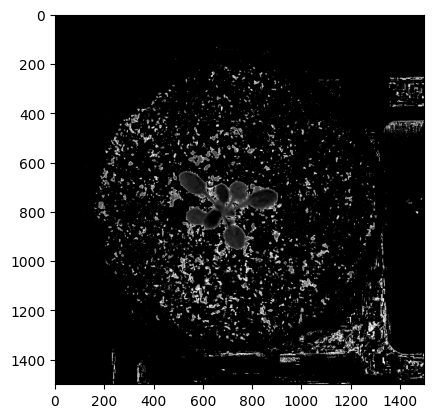

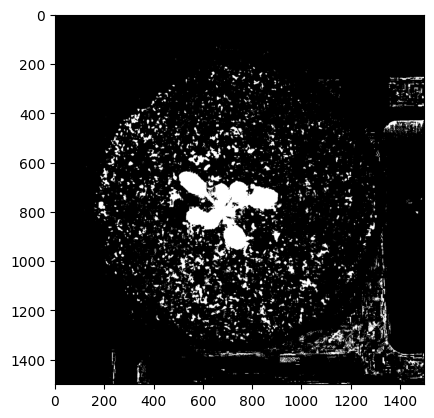

In [18]:
img_A=pcv.rgb2gray_lab(rgb_img=img_parts[0], channel="A")
img_A_hist_EQU=pcv.hist_equalization(img_A)
pcv.visualize.histogram(img=img_A)
pcv.visualize.histogram(img=img_A_hist_EQU)
img_A_thresh, __ = pcv.threshold.custom_range(img=img_A_hist_EQU, lower_thresh=[0], upper_thresh=[30], channel='gray')

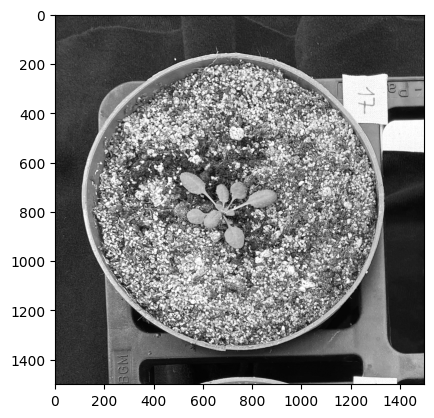

alt.Chart(...)

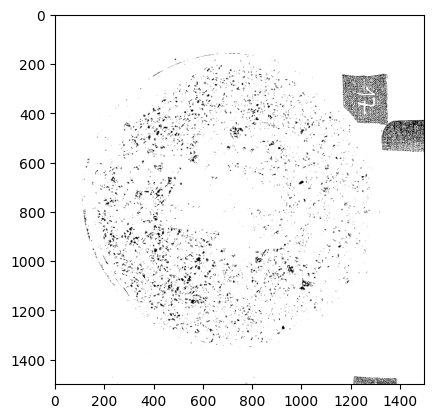

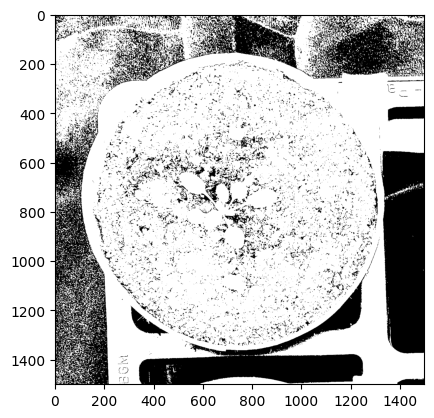

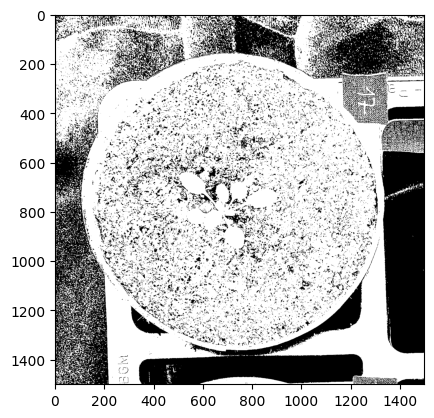

In [29]:
img_V=pcv.rgb2gray_hsv(rgb_img=img_parts[0], channel="V")
pcv.visualize.histogram(img=img_V)
img_V_thresh_up = pcv.threshold.binary(gray_img=img_V, threshold = 250, object_type='dark')
img_V_thresh_down = pcv.threshold.binary(gray_img=img_V, threshold = 50, object_type='light')
img_V_thresh = cv.bitwise_and(img_V_thresh_up,img_V_thresh_down)
pcv.plot_image(img_V_thresh)


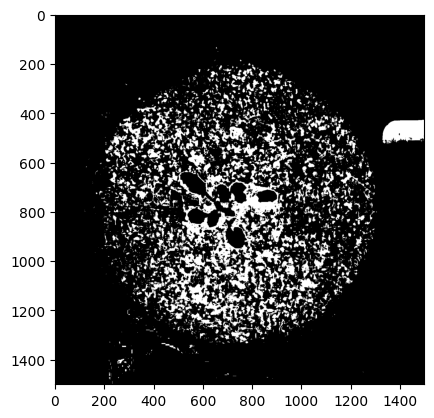

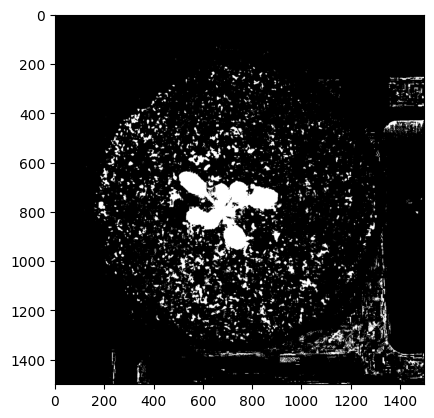

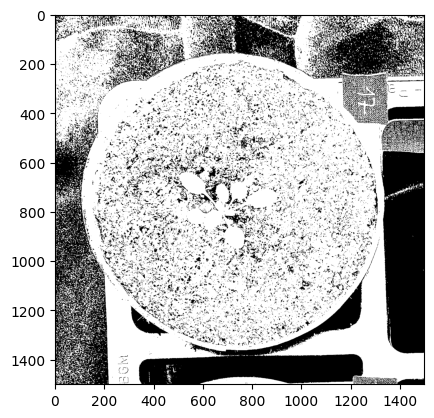

In [30]:
# in this way we habe now a binary mask

pcv.plot_image(img_H_thresh)
pcv.plot_image(img_A_thresh)
pcv.plot_image(img_V_thresh)

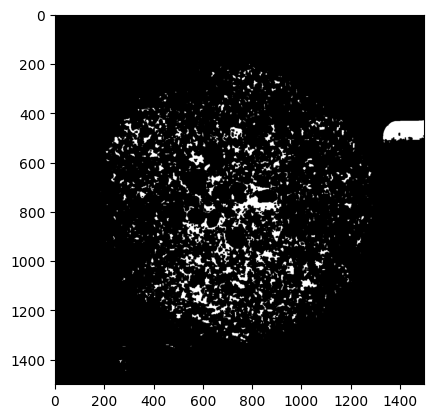

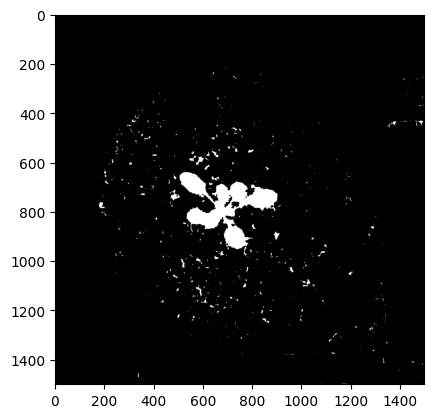

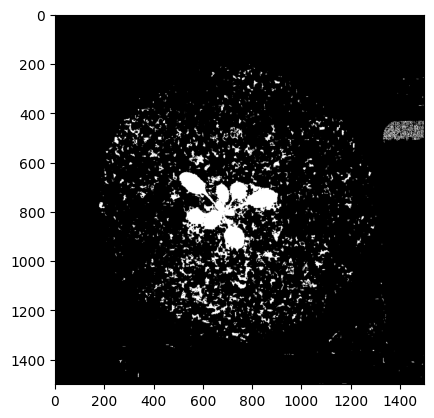

In [31]:
img_H_thresh_erode = pcv.erode(gray_img = img_H_thresh, ksize = 5, i = 1)
img_A_thresh_erode = pcv.erode(gray_img = img_A_thresh, ksize = 5, i = 1)
img_thresh = cv.bitwise_or(img_A_thresh_erode,img_H_thresh_erode)
img_thresh = cv.bitwise_and(img_thresh,img_V_thresh)
pcv.plot_image(img_thresh)

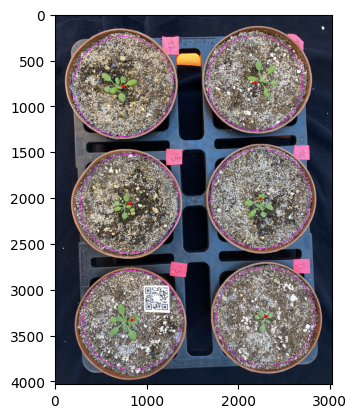

Execution time: 40.94 seconds


In [36]:
img_HoughCircles = img.copy()
start_time = time.time()
circles_list = []
img_GRAY=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_mB = cv.medianBlur(img_GRAY,5)
circles= cv.HoughCircles(image=img_mB,method=cv.HOUGH_GRADIENT,dp=4,minDist=1200,param1=60,param2=40,minRadius=500,maxRadius=600)
circles = np.uint16(np.around(circles))
circles_list.append(circles)
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(img_HoughCircles,(i[0],i[1]),i[2],(255,0,255),4)
    # draw the center of the circle
    cv.circle(img_HoughCircles,(i[0],i[1]),2,(0,0,255),30)
pcv.plot_image(img_HoughCircles)
end_time = time.time()
print('Execution time:', round(end_time - start_time, 2), 'seconds')